**1. A* - Peg Solitaire**

1. Imports

In [ ]:
import numpy as np
import heapq
from itertools import count
import time
import matplotlib.pyplot as plt

2. Global Variables

In [ ]:
MOVES = [(-2, 0), (2, 0), (0, -2), (0, 2)]
TARGET = np.array([3, 2]) #Posicion objetivo de la ultima pieza (3, 2)
 # 0 es un espacio inválido, 1 una ficha y -1 un espacio libre
INITIAL_BOARD = np.array([
    [0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0],
    [1, 1, 1, 1, 1],
    [1, 1, -1, 1, 1],
    [1, 1, 1, 1, 1],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0]
])

OBJECTIVE = np.array([
    [0, -1, -1, -1, 0],
    [0, -1, -1, -1, 0],
    [-1, -1, -1, -1, -1],
    [-1, -1,  -1, -1, -1],
    [-1, -1, -1, -1, -1],
    [0, -1, -1, -1, 0],
    [0, -1, -1, -1, 0]
])


In [ ]:
def setObjective(): #Se define el estado objetivo
  global OBJECTIVE
  OBJECTIVE[TARGET[0], TARGET[1]] = 1
  return OBJECTIVE

3. Game Functions: "Peg Solitaire"

In [ ]:
def getMoves(board):
    moves = [] #Lista de movimientos validos en el tablero
    positions = np.argwhere(board == 1)  #Todas las posiciones de la matriz que sean igual a 1 (fichas)

    for x, y in positions:
        for dx, dy in MOVES:
            ni, nj = x + dx, y + dy  # Nueva posición después del salto
            mi, mj = x + dx // 2, y + dy // 2  # Posición intermedia (El que se borra)

            if (0 <= ni < board.shape[0] and 0 <= nj < board.shape[1] and
                board[ni, nj] == -1 and board[mi, mj] == 1): #Movimiento Valido (está vacío donde cae y hay una ficha en medio)
                moves.append(((x, y), (mi, mj), (ni, nj)))  # (Inicio, Salto, Destino)
    return moves

def applyMove(board, move): #move = (Inicio, Salto, Destino)
    new_board = board.copy()
    (start, middle, end) = move
    new_board[start] = -1  # Quitar ficha del inicio
    new_board[middle] = -1  # Eliminar ficha sobre la que se saltó
    new_board[end] = 1  # Poner ficha en la posición final
    return new_board

def isGoal(board):
    #valida si ya se llega al estado objetivo
    return np.array_equal(board, OBJECTIVE)


4. Cálculo de la heurística

In [ ]:
# h(n) debe ser menor o igual al costo real
# El costo del nodo actual al nodo siguiente + costo del nodo actual al objetivo >= costo del nodo actual al nodo siguiente

In [ ]:
def heuristica(board):
    positions = np.argwhere(board == 1)

    if positions.size == 0:
        return float('inf')

    distances = np.sum(np.abs(positions - TARGET), axis=1)
    moves_penalty = len(getMoves(board))  # Penalizar estados con menos movimientos
    return np.sum(distances) - moves_penalty

Para g(n) lo que haremos es tomar la cantidad de turnos que fueron necesarios para llegar a la posición actual, llevaremos un contador que irá incrementando

Para h(n) calculamos las suma de todas las distancias de manhattan de cada ficha al espacio objetivo donde la ultima ficha queda. Esto nos da el estimado de turnos restantes para llegar al estado objetivo

5. Obtener Información del Tablero

In [ ]:
def getBoardInfo(board, g, moves):
    f = g + 1 + heuristica(board) #f(n) = g(n) + h(n)
    return (f, g + 1, tuple(map(tuple, board)), moves)
    #Se calcula el valor de f(n).

6. Implementación del A*

In [ ]:
def aStarSearch(board):
    if isGoal(board):
        print("The solution was found")
        return

    closed = set() #Lista de nodos visitados
    open = [] #Lista de nodos abiertos
    heapq.heappush(open, getBoardInfo(board, 0, [])) #Heap ordena automaticamente por f(n) por lo que
    #se escoge siempre el f mas optimo.

    # Inicialización de las variables para graficar
    start_time = time.time()
    time_points = []
    open_sizes = []

    while open:
        # Guardar tiempo y cantidad de nodos abiertos
        current_time = time.time() - start_time
        time_points.append(current_time)
        open_sizes.append(len(open))

        f, g, currentBoard, moves = heapq.heappop(open) #Saca la posicion con el f mas optimo

        if isGoal(currentBoard):
            print("The solution was found")
            return moves, time_points, open_sizes

        if currentBoard in closed:
            continue

        closed.add(currentBoard) #entra a la lista de visitados

        for move in getMoves(np.array(currentBoard)): #revisa todos los movimientos posibles del estado actual del tablero
            newBoard = applyMove(np.array(currentBoard), move)
            newMoves = moves + [move]
            heapq.heappush(open, getBoardInfo(newBoard, g, newMoves)) #Itroduce y calcula todos los valores f de todos los estados

    print("The solution could not be found.")
    return moves, time_points, open_sizes

#Mostrar Visualmente los resultados
def print_board(board):
    for row in board:
        print(" ".join(['■' if cell == 1 else '□' if cell == -1 else ' ' for cell in row]))
    print("\n")

def print_solution(board, solution):
    current_board = board.copy()

    print("Tablero inicial:")
    print_board(current_board)
    print("=" * 20)

    print(f"Solución encontrada en {len(solution)} movimientos:\n")
    for i, move in enumerate(solution):
        print(f"Movimiento {i+1}: {tuple(tuple(int(coord) for coord in step) for step in move)}")

        current_board = applyMove(current_board, move)
        print_board(current_board)

7. Ejecucion del A*

In [ ]:
setObjective() #Define como se ve el estado objetivo del juego

start_time = time.time()  # Start time

solution, time_points, open_sizes = aStarSearch(INITIAL_BOARD)
print_solution(INITIAL_BOARD, solution)

end_time = time.time()  # End time

elapsed_time = end_time - start_time
print(f"Function execution time: {elapsed_time:.4f} seconds")

The solution was found
Tablero inicial:
  ■ ■ ■  
  ■ ■ ■  
■ ■ ■ ■ ■
■ ■ □ ■ ■
■ ■ ■ ■ ■
  ■ ■ ■  
  ■ ■ ■  


Solución encontrada en 25 movimientos:

Movimiento 1: ((1, 2), (2, 2), (3, 2))
  ■ ■ ■  
  ■ □ ■  
■ ■ □ ■ ■
■ ■ ■ ■ ■
■ ■ ■ ■ ■
  ■ ■ ■  
  ■ ■ ■  


Movimiento 2: ((2, 0), (2, 1), (2, 2))
  ■ ■ ■  
  ■ □ ■  
□ □ ■ ■ ■
■ ■ ■ ■ ■
■ ■ ■ ■ ■
  ■ ■ ■  
  ■ ■ ■  


Movimiento 3: ((0, 1), (1, 1), (2, 1))
  □ ■ ■  
  □ □ ■  
□ ■ ■ ■ ■
■ ■ ■ ■ ■
■ ■ ■ ■ ■
  ■ ■ ■  
  ■ ■ ■  


Movimiento 4: ((3, 2), (2, 2), (1, 2))
  □ ■ ■  
  □ ■ ■  
□ ■ □ ■ ■
■ ■ □ ■ ■
■ ■ ■ ■ ■
  ■ ■ ■  
  ■ ■ ■  


Movimiento 5: ((2, 4), (2, 3), (2, 2))
  □ ■ ■  
  □ ■ ■  
□ ■ ■ □ □
■ ■ □ ■ ■
■ ■ ■ ■ ■
  ■ ■ ■  
  ■ ■ ■  


Movimiento 6: ((0, 3), (1, 3), (2, 3))
  □ ■ □  
  □ ■ □  
□ ■ ■ ■ □
■ ■ □ ■ ■
■ ■ ■ ■ ■
  ■ ■ ■  
  ■ ■ ■  


Movimiento 7: ((5, 2), (4, 2), (3, 2))
  □ ■ □  
  □ ■ □  
□ ■ ■ ■ □
■ ■ ■ ■ ■
■ ■ □ ■ ■
  ■ □ ■  
  ■ ■ ■  


Movimiento 8: ((4, 0), (4, 1), (4, 2))
  □ ■ □  
  □ ■ □  
□ ■ ■ ■ □
■ 

8. Gráfico de Desempeño

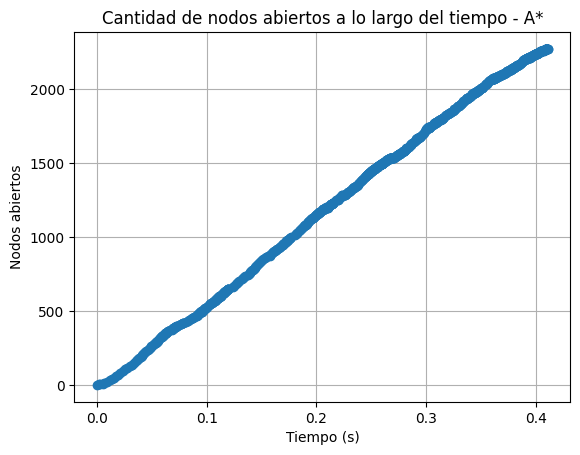

In [ ]:
#Graficar nodos biertos a lo largo del tiempo
plt.plot(time_points, open_sizes, marker='o', linestyle='-')
plt.xlabel("Tiempo (s)")
plt.ylabel("Nodos abiertos")
plt.title("Cantidad de nodos abiertos a lo largo del tiempo - A*")
plt.grid(True)
plt.show()

#Un resultado bastante lineal. Asumimos que este resultado solo ocurre ya que el método utilizado encuentra la solución bastante rápido.

**2. Min-Max - Lines and Boxes**

In [ ]:
import numpy as np
import copy
import time

Esta función determina si el juego ha terminado comparando:
- linesDrawn: Cantidad de líneas que ya se han dibujado
- totalLines: Cantidad total de líneas posibles en el tablero

El juego termina cuando todas las líneas han sido dibujadas.

In [ ]:
def isTerminal(state):
    return state['linesDrawn'] == state['totalLines']

Esta función permite calcular el valor de un estado del juego, lo realiza restando la puntuación del jugador menos la puntuación del oponente.

In [ ]:
def utility(state, player):
    opponent = 1 - player
    return state["scores"][player] - state["scores"][opponent]

Esta función determina todas las acciones válidas en el estado actual:

- Recorre todas las líneas horizontales y verticales posibles
- Agrega a la lista sólo aquellas que aún no han sido dibujadas (valor 0)
- Cada acción se representa como una tupla: (tipo, fila, columna)

Tipo 'h' para líneas horizontales y tipo 'v' para líneas verticales

In [ ]:
def getActions(state):
        actions = []

        # Verificar líneas horizontales disponibles
        for i in range(state['size'] + 1):
            for j in range(state['size']):
                if state['horizontalLines'][i, j] == 0:
                    actions.append(('h', i, j))

        # Verificar líneas verticales disponibles
        for i in range(state['size']):
            for j in range(state['size'] + 1):
                if state['verticalLines'][i, j] == 0:
                    actions.append(('v', i, j))

        return actions

- Crea una copia profunda del estado para no modificar el original
- Aplica la acción seleccionada:
  - Marca la línea correspondiente en el tablero
  - Incrementa el contador de líneas dibujadas

- Verifica si se completó alguna caja:
  - Para líneas horizontales, comprueba cajas arriba y abajo
  - Para líneas verticales, comprueba cajas a la izquierda y derecha


Si se completa una caja:

- Marca la caja con el número del jugador
- Aumenta la puntuación del jugador
- Establece scored = True

Cambia el turno al otro jugador solo si no se completó una caja y retorna el nuevo estado y si se completó una caja

In [ ]:
def applyAction(state, action, player=None):
    newState = copy.deepcopy(state)

    if player is None:
        player = newState["maximizingPlayer"]
    actionType, i, j = action
    scored = False

    if actionType == 'h':
        newState["horizontalLines"][i, j] = player + 1
    else:
        newState["verticalLines"][i, j] = player + 1

    newState["linesDrawn"] += 1

    # Verificar si se completó alguna caja
    if actionType == 'h':
        if i > 0 and checkBox(newState, i-1, j):
            newState["boxes"][i-1, j] = player + 1
            newState["scores"][player] += 1
            scored = True

        # Verificar caja abajo (si existe)
        if i < newState["size"] and checkBox(newState, i, j):
            newState["boxes"][i, j] = player + 1
            newState["scores"][player] += 1
            scored = True

    else:  # actionType == 'v'
        # Verificar caja izquierda (si existe)
        if j > 0 and checkBox(newState, i, j-1):
            newState["boxes"][i, j-1] = player + 1
            newState["scores"][player] += 1
            scored = True

        # Verificar caja derecha (si existe)
        if j < newState["size"] and checkBox(newState, i, j):
            newState["boxes"][i, j] = player + 1
            newState["scores"][player] += 1
            scored = True

    # Cambiar de jugador solo si no se completó una caja
    if not scored:
        newState["maximizingPlayer"] = 1 - player  # Alterna entre 0 y 1

    return newState, scored

Esta función verifica si se completó una caja comprobando que las cuatro líneas estén dibujadas.

In [ ]:
def checkBox(state, i, j):
    horizontalLines = state["horizontalLines"]
    verticalLines = state["verticalLines"]

    return (horizontalLines[i, j] != 0 and
            horizontalLines[i+1, j] != 0 and
            verticalLines[i, j] != 0 and
            verticalLines[i, j+1] != 0)

Esta función llama a minmax basada en en jugador atual, retorna la mejor acción encontreada controlando la profundidad del grafo con el parámetro depth.

In [ ]:
def getBestMove(state, depth=6):
    if state["maximizingPlayer"] == 1:
        _, bestAction = minimax(state, depth, float('-inf'), float('inf'), True)
    else:
        _, bestAction = minimax(state, depth, float('-inf'), float('inf'), False)

    return bestAction

Función principal del algoritmo:
- Se manejan los casos base
- Se inicializan valores según el jugador
- Se generan todos los movimientos posibles
- Se aplica truncado del grafo con alpha y beta
- Para cada movimiento se calcula de forma recursiva su valor

Retorna el mejor valor y acción encontrados.

In [ ]:
def minimax(state, depth, alpha, beta, maximizingPlayer):
    if depth == 0 or isTerminal(state):
        return utility(state, 1), None

    bestAction = None

    if maximizingPlayer:
        value = float('-inf')
        player = 1
    else:
        value = float('inf')
        player = 0

    actions = getActions(state)

    actions_sizes.append(len(actions))
    time_points2.append(time.time() - start_time2)

    for action in actions:
        newState, scored = applyAction(state, action, player)

        # Si se completó una caja, el mismo jugador continúa
        if scored:
            newValue, _ = minimax(newState, depth - 1, alpha, beta, maximizingPlayer)
        else:
            newValue, _ = minimax(newState, depth - 1, alpha, beta, not maximizingPlayer)

        if maximizingPlayer:
            if newValue > value:
                value = newValue
                bestAction = action
            alpha = max(alpha, value)
        else:
            if newValue < value:
                value = newValue
                bestAction = action
            beta = min(beta, value)

        if beta <= alpha:
            break

    return value, bestAction

Función para crear el estado y todos sus componentes necesarios.
- Crea matrices para almacenar:

  - Líneas horizontales y verticales (0 = no dibujada)
  - Cajas (0 = vacía, 1 = jugador 1, 2 = jugador 2)


- Inicializa las puntuaciones de los jugadores a 0
- Establece el jugador inicial (0)
- Calcula el total de líneas posibles: 2 * size * (size + 1)
- Inicializa las líneas dibujadas a 0
- Retorna un diccionario con toda la información del estado

In [ ]:
def createState(size):
    horizontal_Lines = np.zeros((size + 1, size), dtype=int)
    verticalLines = np.zeros((size, size + 1), dtype=int)

    # Matriz para registrar qué jugador completó cada caja
    boxes = np.zeros((size, size), dtype=int)
    # Puntuación de cada jugador
    scores = {0: 0, 1: 0}
    # Jugador actual: 0 o 1
    maximizingPlayer = 0
    # Total de líneas posibles
    totalLines = 2 * size * (size + 1)
    # Número de líneas dibujadas
    linesDrawn = 0

    return {
        "horizontalLines": horizontal_Lines,
        "verticalLines": verticalLines,
        "boxes": boxes,
        "scores": scores,
        "maximizingPlayer": maximizingPlayer,
        "totalLines": totalLines,
        "linesDrawn": linesDrawn,
        "size": size
    }

Función para imprimir el estado del tablero

In [ ]:
def printBoard(state):
    size = state["size"]
    horizontalLines = state["horizontalLines"]
    verticalLines = state["verticalLines"]
    boxes = state["boxes"]
    scores = state["scores"]

    for i in range(size + 1):
        # Imprimir puntos y líneas horizontales
        line = ""
        for j in range(size + 1):
            line += "o"  # Punto
            if j < size:
                # Línea horizontal
                if horizontalLines[i, j] == 1:
                    line += "---"
                elif horizontalLines[i, j] == 2:
                    line += "==="
                else:
                    line += "   "
        print(line)

        if i < size:
            # Imprimir líneas verticales y el interior de las cajas
            line = ""
            for j in range(size + 1):
                # Línea vertical
                if verticalLines[i, j] == 1:
                    line += "|"
                elif verticalLines[i, j] == 2:
                    line += "‖"
                else:
                    line += " "

                # Interior de la caja
                if j < size:
                    if boxes[i, j] == 1:
                        line += " 0 "
                    elif boxes[i, j] == 2:
                        line += " 1 "
                    else:
                        line += "   "
            print(line)

    print(f"Puntuación - Jugador 0: {scores[0]}, Jugador 1: {scores[1]}")

In [ ]:
start_time2 = time.time()  # Start time

# Variables para gráfico
actions_sizes = []
time_points2 = []

state = createState(3)
while not isTerminal(state):
  move = getBestMove(state)
  state, _ = applyAction(state, move)
  printBoard(state)
  print("\n\n")

end_time2 = time.time()  # End time

elapsed_time2 = end_time2 - start_time2
print(f"Function execution time: {elapsed_time2:.4f} seconds")

o---o   o   o
             
o   o   o   o
             
o   o   o   o
             
o   o   o   o
Puntuación - Jugador 0: 0, Jugador 1: 0



o---o===o   o
             
o   o   o   o
             
o   o   o   o
             
o   o   o   o
Puntuación - Jugador 0: 0, Jugador 1: 0



o---o===o---o
             
o   o   o   o
             
o   o   o   o
             
o   o   o   o
Puntuación - Jugador 0: 0, Jugador 1: 0



o---o===o---o
             
o===o   o   o
             
o   o   o   o
             
o   o   o   o
Puntuación - Jugador 0: 0, Jugador 1: 0



o---o===o---o
             
o===o---o   o
             
o   o   o   o
             
o   o   o   o
Puntuación - Jugador 0: 0, Jugador 1: 0



o---o===o---o
             
o===o---o===o
             
o   o   o   o
             
o   o   o   o
Puntuación - Jugador 0: 0, Jugador 1: 0



o---o===o---o
             
o===o---o===o
             
o---o   o   o
             
o   o   o   o
Puntuación - Jugador 0: 0, Jugador 1: 0



o---o===o---o

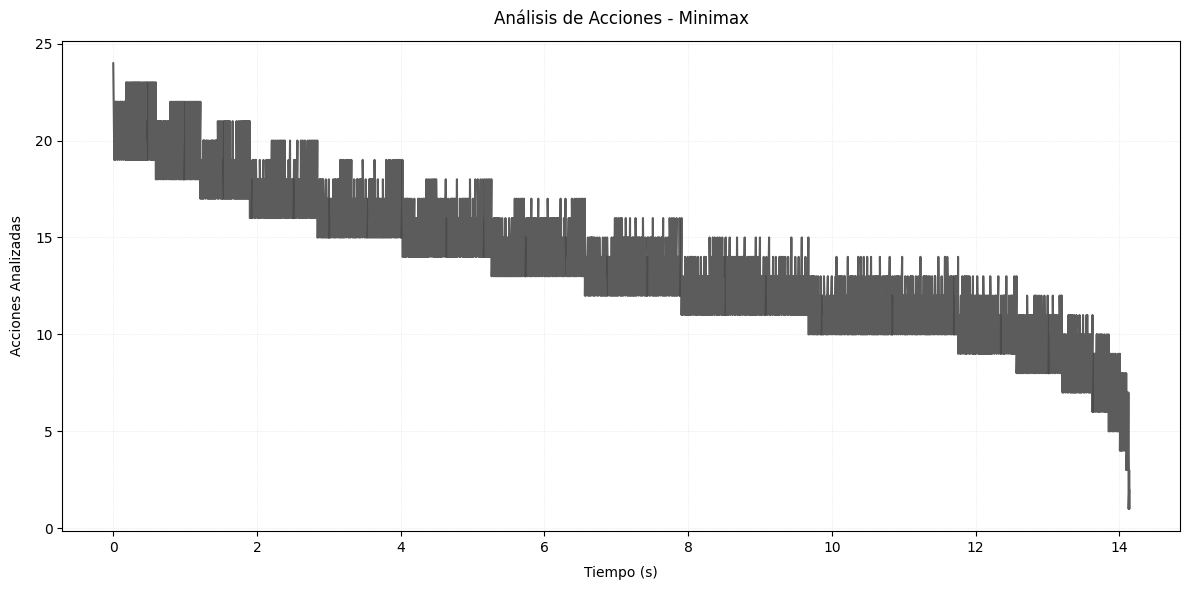

In [ ]:
import matplotlib.pyplot as plt

# Configuración de rendimiento
plt.style.use('fast')  # Estilo minimalista para mejor performance
plt.figure(figsize=(12, 6), dpi=100)

# Gráfico simplificado sin marcadores
plt.plot(time_points2, actions_sizes,
         linewidth=1.5,
         color='#4a4a4a',  # Gris oscuro
         alpha=0.9,
         solid_capstyle='round')

# Diseño funcional
plt.xlabel("Tiempo (s)", fontsize=10, labelpad=8)
plt.ylabel("Acciones Analizadas", fontsize=10, labelpad=8)
plt.title("Análisis de Acciones - Minimax", fontsize=12, pad=12)

# Cuadrícula ligera
plt.grid(True, linestyle=':', linewidth=0.5, alpha=0.4)

# Optimización de renderizado
plt.tight_layout()
plt.gca().set_rasterized(True)  # Acelera renderizado en grandes datasets

plt.show()